- Now, repeat the computation by considering the randomized SVD algorithm of rank $k = 1, 5, 10, 50$ and $100$.
- Plot the approximate singular values together with the exact singular values.


```python
ks = np.array([1, 5, 10, 50, 100])
rs_array = list()

for k in ks:
    _, rs, _ = randomized_SVD(A_bar, k)
    rs_array.append(rs)

fig, axs = plt.subplots(len(ks), 1, figsize=(5, 5 * len(ks)))
i = 0
for rs in rs_array:
    axs[i].plot(s, "o-", label="exact", linewidth=3, markersize=1)
    axs[i].semilogy(rs, "o-", label="k = %d" % ks[i], linewidth=3, markersize=1)
    axs[i].legend()
    i += 1

Plot the trend of the reconstruction error of the dataset as a function of k in the three cases.

```python

plt.semilogy(ks, reconstruction_error, "o-", label="exact", linewidth=3, markersize=1)
plt.semilogy(
    ks, reconstruction_error_rand, "o-", label="randomized", linewidth=3, markersize=1
)
plt.semilogy(
    ks,
    reconstruction_error_rand_oversampling,
    "o-",
    label="randomized + oversampling",
    linewidth=3,
    markersize=1,
)
plt.legend()

---

In [ ]:
import matplotlib as plt
import jax
import jax.numpy as jnp

def plot_optimization_2d(func, gd_path, gd_backtrack_path, title):
    x_vals = jnp.linspace(-5, 5, 50)
    y_vals = jnp.linspace(-5, 5, 50)
    X, Y = jnp.meshgrid(x_vals, y_vals)
    Z = jnp.array([[func(jnp.array([x, y])) for x in x_vals] for y in y_vals])

    fig, axs = plt.subplots(1, 2, figsize=(14, 6))
    cs = axs[0].contourf(X, Y, Z, levels=50, cmap="viridis")
    plt.colorbar(cs)
    axs[0].contour(X, Y, Z, colors="white")

    gd_path = jnp.array(gd_path)

    axs[0].plot(gd_path[:, 0], gd_path[:, 1], "r.-", label="GD")

    if gd_backtrack_path != []:
        gd_backtrack_path = jnp.array(gd_backtrack_path)
        axs[0].plot(
            gd_backtrack_path[:, 0],
            gd_backtrack_path[:, 1],
            ".-",
            color="orange",
            label="GD + backtracking",
        )
    axs[0].set_title(title)
    axs[0].set_xlabel("x")
    axs[0].set_ylabel("y")
    axs[0].set_ylim([-5, 5])
    axs[0].set_xlim([-5, 5])
    axs[0].legend()

    axs[1].semilogy([func(x) for x in gd_path], "ro-", label="GD")
    axs[1].semilogy(
        [func(x) for x in gd_backtrack_path],
        "o-",
        color="orange",
        label="GD + backtracking",
    )
    axs[1].legend()
    plt.tight_layout()

---

### PLOT THE FUNCTION

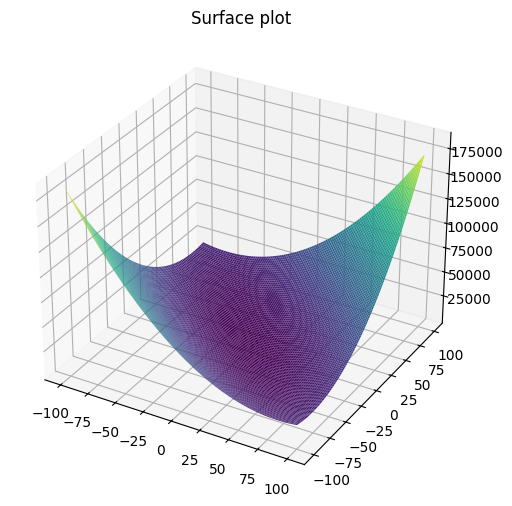

In [2]:
#Consider the following function (where x = (x, y))
#f(x) = (x + 2y − 7)2 + (2x + y − 5)2
import numpy as np
import matplotlib.pyplot as plt
def f(x):
    x, y = x
    return (x + 2*y - 7)**2 + (2*x + y - 5)**2

# plot the plane 
x = np.linspace(-100, 100, 100)
y = np.linspace(-100, 100, 100)
X, Y = np.meshgrid(x, y)
Z = f((X, Y))
plt.figure(figsize=(8, 6))
# use 3d plot
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('Surface plot')
plt.show()